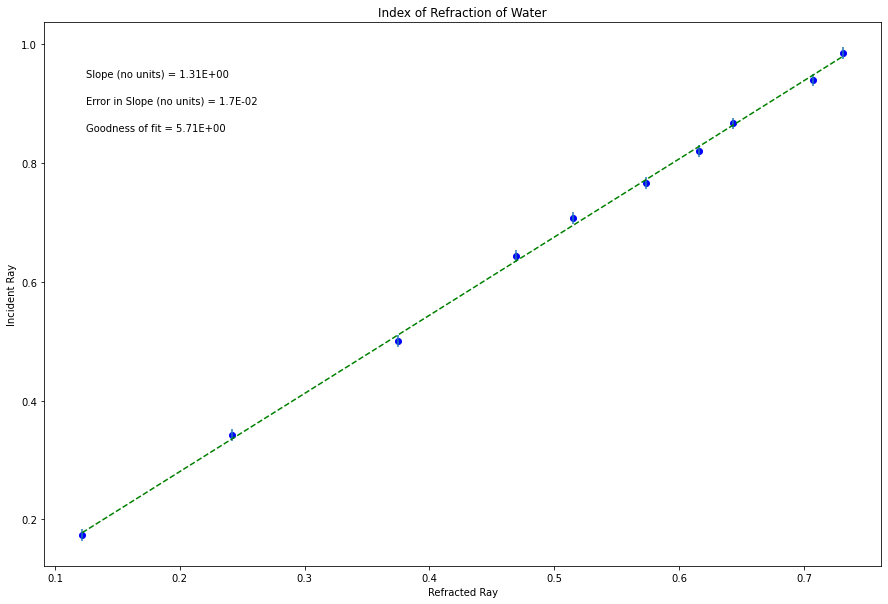

In [16]:
#Physics 218
#Jamison Talley
#4-20-22
#-------------------------------------------#
%matplotlib inline

#Import packages and libraries needed and give them shortcut names

import math
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
in_ray = np.array([0.173648178,0.342020143,0.5,0.64278761,
    0.707106781,0.766044443,0.819152044,0.866025404,0.939692621,0.984807753]) #no units

ref_ray = np.array([0.121869343, 0.241921896, 0.374606593, 0.469471563, 0.515038075,
                    0.573576436, 0.615661475, 0.64278761, 0.707106781, 0.731353702]) #no units



#--------------------------------------------#
#Create arrays for uncertainties
err_in = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

brute force the uncertianty in theta
for i1 in range(10):
    #err_ref[i1] = math.sin(math.radians(ref_ray[i1] + 1)) - math.sin(math.radians(ref_ray[i1]))


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = ref_ray   #this should be the array you want to plot on the x axis
y = in_ray
dy = err_in  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Refracted Ray')
plt.ylabel('Incident Ray')
plt.title('Index of Refraction of Water')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (no units) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (no units) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
